# Testing myml

Start by importing the class object **mynet** from the python script **myml.py**.
Then import the mnist dataset, a set of 28x28 pixel handwritten numbers with labels.

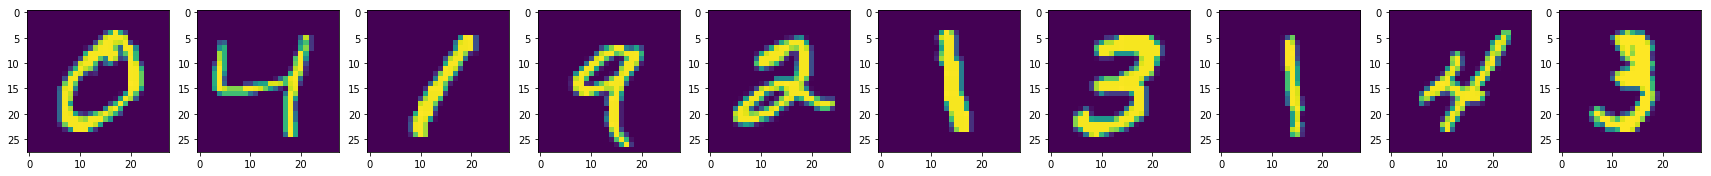

In [1]:
import numpy as np
from myml import mynet
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

    
(x_train, y_traini),(x_test, y_testi) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(len(x_train[:, 0]), -1)
x_test = x_test.reshape(len(x_test[:, 0]), -1)
y_train = np.zeros((len(y_traini), 10), dtype='float')
for i in range(len(y_traini)):
    y_train[i, y_traini[i]] = 1
y_test = np.zeros((len(y_testi), 10), dtype='float')
for i in range(len(y_testi)):
    y_test[i, y_testi[i]] = 1

plt.figure(figsize=[30, 3])
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i+1, :].reshape(28, 28))

## Initialise the net

Create the neural network by passing the class object the number of input and output nodes.<br>
In this case I have also passed an activation function to replace the default sigmoid, this function must have an option to find the derivative.<br>
Finally, pass the data to the net to for training and test sets.

In [2]:
def linact(x, dif=False):
    if dif is False:
        x[x < 0] = 0
        return x
    else:
        x[x < 0] = 0
        x[x > 0] = 1
        return x

    
test = mynet(784, 10, activation=linact)
test.add_layers([15, 15])

test.give_data(x_train, y_train, datatype='train')
test.give_data(x_test, y_test, datatype='test')

test.print_layers()

784 (15, 784) (15,) 15 (15, 15) (15,) 15 (10, 15) (10,) 10 


## Train the network

Now train the network. The first argument is how many mini batches to split the training data into. The second, the number of times to train over the full data set. Finally, the third is a parameter that adjusts how fast the net learns.

In [3]:
test.training_montage(6000, 15, 0.1)

Before training achieved a grade of 0.0 with an average cost of 0.45116
Starting round 1/15
Round 1/15 complete in 9 seconds! Achieved a grade of 88.66 with an average cost of 0.07853
Starting round 2/15
Round 2/15 complete in 9 seconds! Achieved a grade of 91.77 with an average cost of 0.05611
Starting round 3/15
Round 3/15 complete in 9 seconds! Achieved a grade of 92.96 with an average cost of 0.04894
Starting round 4/15
Round 4/15 complete in 9 seconds! Achieved a grade of 92.98 with an average cost of 0.05218
Starting round 5/15
Round 5/15 complete in 9 seconds! Achieved a grade of 94.33 with an average cost of 0.04221
Starting round 6/15
Round 6/15 complete in 9 seconds! Achieved a grade of 93.69 with an average cost of 0.04674
Starting round 7/15
Round 7/15 complete in 9 seconds! Achieved a grade of 94.52 with an average cost of 0.04115
Starting round 8/15
Round 8/15 complete in 10 seconds! Achieved a grade of 94.09 with an average cost of 0.04574
Starting round 9/15
Round 9/15 

## Print some stuff

Print a random evaluation from the test set and compare to the label.<br>
Also, print the weights of the first layer, each titled with the bias then applied.

Test data index = 1827
Output = [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Label = [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]




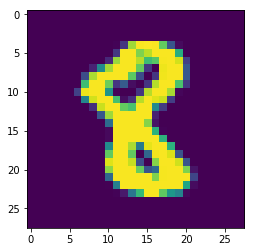

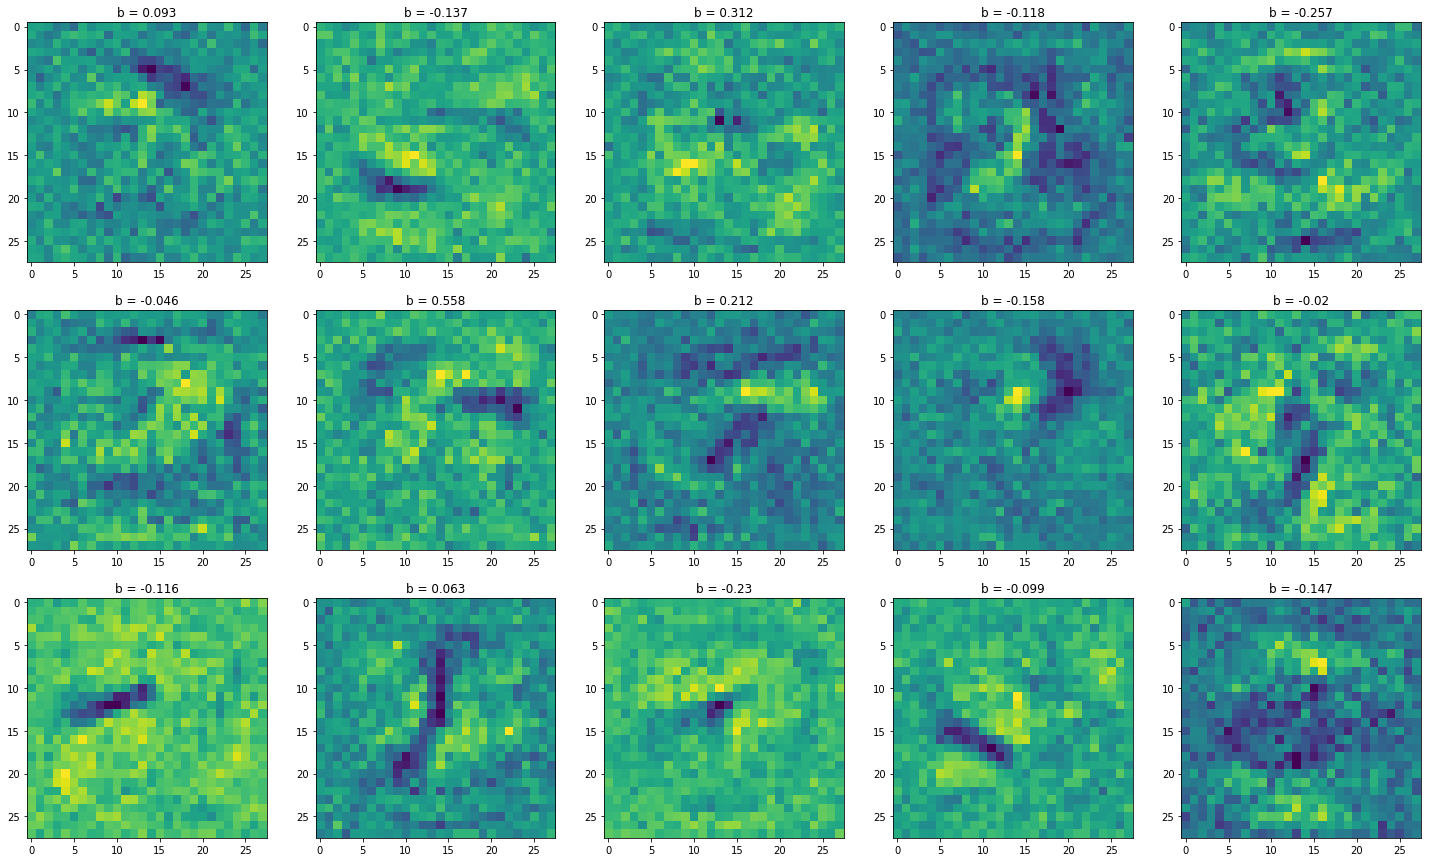

In [4]:
pick = int(np.random.rand(1)*len(test.testdata[0]))
plt.figure(figsize=[4, 4])
plt.imshow(test.testdata[0][pick].reshape(28, 28))
print('Test data index = ' + str(pick))
print('Output = ' + str(np.round(test.evaluate(test.testdata[0][pick]), decimals=2)))
print('Label = ' + str(test.testdata[1][pick]) + '\n\n')

plt.figure(figsize=[25, 15])
for i in range(15):
    mapped = test.weights[0][i, :].reshape(28, 28)
    plt.subplot(3, 5, i+1)
    plt.title('b = ' + str(np.round(test.biases[0][i], decimals=3)))
    plt.imshow(mapped)